## MSDS 7331: Data Mining
## Lab 1: Visualization and Data Preprocessing
## 26 May 2019
## Authors: Meredith Ludlow, Anand Rajan, Kristen Rollins, and Tej Tenmattam

---

### Business Understanding

<div class="alert alert-block alert-info">
<b>Rubric 1:</b> Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). Describe how you would define and measure the outcomes from the dataset. That is, why is this data important and how do you know if you have mined useful knowledge from the dataset? How would you measure the effectiveness of a good prediction algorithm? Be specific.
</div>

The Census buereau data presents census data the entire US and includes Puerto Rico and DC. The data is 5 year estimates from 2015 American community survey. The data contains 37 socio economic data, the race, sex and is produced for all counties. Here we only select the summaries of US states for our study. While we see in reports (ref:American community survey release) that the poverty of many counties decreased over the last 5 years and median income has increased, we want to see how this has affected our nations economy interms of Unemployment and poverty eradication. Important thing to note in the same report is that there were counties which had negative growth reported as well.

### Data Meaning Type

<div class="alert alert-block alert-info">
<b>Rubric 2:</b> Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file.
</div>

We selected the Census data 2017 by American community survey from __[Kaggle](https://www.kaggle.com/muonneutrino/us-census-demographic-data)__. It has data from the entire US and can be used for analysis and would provide interesting insights. Full sets of data are found in the American fact finder website.  We will be using acs2017_census_data.csv for our analysis.
We have 37 variables available for our analysis. There are 74,001 rows in total and we will be utilizing all data for our analysis. We will be using main attributes that could be used to predict unemployment in each state and poverty rate. We can also predict state through classification or do regression analysis on unemployment or income.

Acknowledgement goes to Census bureau of the US. Since this is US federal government product, copyrights are not violated if used within the US.
The attribute definitions are as follows:

| Attribute | Data Type | Description |
|-----------|-----------|-------------|
| TractID | Nominal | Unique identification number for the census tract <br/> (A tract is a geographic area, comparable to a neighborhood, <br/> defined for the purpose of taking a census.) |
| State | Nominal | U.S. state or territory the tract is located in |
| County | Nominal | County or county-equivalent the tract is located in |
| TotalPop | Integer | Total population of the census area |
| Men | Integer | Number of men living in the census tract |
| Women | Integer | Number of women living in the census tract |
| Hispanic | Decimal | Percentage of population that is Hispanic/Latino |
| White | Decimal | Percentage of population that is white |
| Black | Decimal | Percentage of population that is black |
| Native | Decimal | Percent of population that is Native American |
| Asian | Decimal | Percent of population that is Asian |
| Pacific | Decimal | Percent of population that is Native Hawaiian or other Pacific Islander |
| VotingAgeCitizen | Integer | Number of voting age citizens in the census tract |
| Income | Decimal | Median household income in USD (\$) |
| IncomeErr | Decimal | Median household income error (\$) |
| IncomePerCap | Decimal | Income per capita (\$) |
| IncomePerCapErr | Decimal | Income per capita error (\$) |
| Poverty | Decimal | Percentage of population under the poverty level |
| ChildPoverty | Decimal | Percentage of children under the poverty level |
| Professional | Decimal | Percent employed in management, business, science, and arts |
| Service | Decimal | Percent employed in service jobs |
| Office | Decimal | Percent employed in sales and office jobs |
| Construction | Decimal | Percent employed in natural resources, construction, and maintenance |
| Production | Decimal | Percent employed in production, transportation, and material movement |
| Drive | Decimal | Percent commuting alone in a car, van, or truck |
| Carpool | Decimal | Percent carpooling in a car, van, or truck |
| Transit | Decimal | Percent commuting on public transportation |
| Walk | Decimal | Percent walking to work |
| OtherTransp | Decimal | Percent commuting via other means |
| WorkAtHome | Decimal | Percentage working at home |
| Mean Commute | Decimal | Mean commute time in minutes |
| Employed | Integer | Number of people employed (16+) |
| PrivateWork | Decimal | Percentage employed in private industry |
| PublicWork | Decimal | Percentage employed in public jobs |
| SelfEmployed | Decimal | Percent self-employed
| FamilyWork | Decimal | Percentage in unpaid family work |
| Unemployed | Decimal | Unemployment rate (%) |

### Data Quality

<div class="alert alert-block alert-info">
<b>Rubric 3:</b> Verify data quality: Explain any missing values, duplicate data, and outliers. Are those mistakes? How do you deal with these problems? Give justifications for your methods.
</div>

Before jumping into analysis, it is important for us to verify the quality of our data. (etc)

In [213]:
# importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
pd.set_option('display.max_columns', 40) # display all columns when printing dataframes
print(os.listdir("Data")) # view our data files
import warnings
warnings.filterwarnings("ignore")

# Advanced plotting... Plotly
from plotly import tools
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

# Statistics imports
import scipy, scipy.stats

# df.head() displays all the columns without truncating
pd.set_option('display.max_columns', None)

['acs2015_census_tract_data.csv', 'acs2015_county_data.csv', 'acs2017_census_tract_data.csv', 'acs2017_county_data.csv']


ModuleNotFoundError: No module named 'plotly'

In [214]:
# A short hand way to plot most bar graphs. Source of this code is https://stackoverflow.com/questions/8924173/how-do-i-print-bold-text-in-python.
def pretty_bar(data, ax, xlabel=None, ylabel=None, title=None, int_text=False):
    
    # Plots the data
    fig = sns.barplot(data.values, data.index, ax=ax)
    
    # Places text for each value in data
    for i, v in enumerate(data.values):
        
        # Decides whether the text should be rounded or left as floats
        if int_text:
            ax.text(0, i, int(v), color='k', fontsize=14)
        else:
            ax.text(0, i, round(v, 3), color='k', fontsize=14)
     
    ### Labels plot
    ylabel != None and fig.set(ylabel=ylabel)
    xlabel != None and fig.set(xlabel=xlabel)
    title != None and fig.set(title=title)

    
### Used to style Python print statements
class color:
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

In [215]:
# reading csv file as pandas dataframe
df_17_census = pd.read_csv('Data/acs2017_census_tract_data.csv')

In [216]:
df_17_census['TractId'].is_unique # if data does not have duplicates

True

In [5]:
# Set index on the records
df_17_census.set_index('TractId', inplace=True)
df_17_census.head() # view first 5 rows of our data

,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
TractId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1001020100,Alabama,Autauga County,1845,899,946,2.4,86.3,5.2,0.0,1.2,0.0,1407,67826.0,14560.0,33018.0,6294.0,10.7,20.8,38.5,15.6,22.8,10.8,12.4,94.2,3.3,0.0,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1001020200,Alabama,Autauga County,2172,1167,1005,1.1,41.6,54.5,0.0,1.0,0.0,1652,41287.0,3819.0,18996.0,2453.0,22.4,35.8,30.5,24.9,22.9,6.3,15.4,90.5,9.1,0.0,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
1001020300,Alabama,Autauga County,3385,1533,1852,8.0,61.4,26.5,0.6,0.7,0.4,2480,46806.0,9496.0,21236.0,2562.0,14.7,21.1,27.9,19.4,33.3,9.9,9.6,88.3,8.4,0.0,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
1001020400,Alabama,Autauga County,4267,2001,2266,9.6,80.3,7.1,0.5,0.2,0.0,3257,55895.0,4369.0,28068.0,3190.0,2.3,1.7,29.0,16.6,25.8,9.1,19.5,82.3,11.2,0.0,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
1001020500,Alabama,Autauga County,9965,5054,4911,0.9,77.5,16.4,0.0,3.1,0.0,7229,68143.0,14424.0,36905.0,10706.0,12.2,17.9,48.8,13.8,20.5,3.5,13.4,86.9,11.2,0.0,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3


In [6]:
df_17_census.info() # list all columns and data types

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74001 entries, 1001020100 to 72153750602
Data columns (total 36 columns):
State               74001 non-null object
County              74001 non-null object
TotalPop            74001 non-null int64
Men                 74001 non-null int64
Women               74001 non-null int64
Hispanic            73305 non-null float64
White               73305 non-null float64
Black               73305 non-null float64
Native              73305 non-null float64
Asian               73305 non-null float64
Pacific             73305 non-null float64
VotingAgeCitizen    74001 non-null int64
Income              72885 non-null float64
IncomeErr           72885 non-null float64
IncomePerCap        73256 non-null float64
IncomePerCapErr     73256 non-null float64
Poverty             73159 non-null float64
ChildPoverty        72891 non-null float64
Professional        73190 non-null float64
Service             73190 non-null float64
Office              73190 

Here we see that the pandas data types for each attribute match those in our data description table, as the pandas "object" type represents a string. Therefore we do not have to make any type conversions.

In [7]:
# View summary statistics on the data features, to detect any abnormalities
df_17_census.describe() 

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
count,74001.000000,74001.000000,74001.000000,73305.000000,73305.000000,73305.00000,73305.000000,73305.000000,73305.000000,74001.000000,72885.000000,72885.000000,73256.000000,73256.000000,73159.000000,72891.000000,73190.000000,73190.000000,73190.000000,73190.000000,73190.000000,73200.000000,73200.000000,73200.000000,73200.000000,73200.000000,73200.000000,73055.000000,74001.000000,73190.000000,73190.000000,73190.000000,73190.000000,73191.000000
mean,4384.716017,2157.710707,2227.005311,17.265444,61.309043,13.28910,0.734047,4.753691,0.147341,3102.885961,61086.829265,9697.465747,30651.804194,4270.174225,16.118186,21.155872,35.559478,18.874446,23.427724,9.239350,12.899281,75.698005,9.308369,5.395186,3.042825,1.894605,4.661466,26.056594,2049.152052,79.494222,14.163342,6.171484,0.171164,7.246738
std,2228.936729,1120.560504,1146.240218,23.073811,30.634461,21.60118,4.554247,8.999888,1.029250,1542.245024,30516.098180,6154.669518,16126.937143,3148.049041,12.691045,18.645759,15.144984,8.137261,5.806091,6.031393,7.712496,15.292660,5.222494,11.689470,5.805753,2.549374,4.014940,7.124524,1138.865457,8.126383,7.328680,3.932364,0.456580,5.227624
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2692.000000,728.000000,32.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2903.000000,1416.000000,1465.000000,2.600000,38.000000,0.80000,0.000000,0.200000,0.000000,2061.000000,40357.000000,5735.000000,20556.750000,2503.000000,6.900000,6.200000,24.700000,13.300000,19.700000,5.000000,7.100000,72.200000,5.700000,0.000000,0.400000,0.400000,2.000000,21.100000,1276.000000,75.200000,9.300000,3.500000,0.000000,3.900000
50%,4105.000000,2007.000000,2082.000000,7.400000,70.400000,3.80000,0.000000,1.500000,0.000000,2905.000000,54375.000000,8267.000000,27215.500000,3404.000000,12.600000,16.300000,33.300000,17.700000,23.200000,8.300000,11.800000,79.900000,8.500000,1.000000,1.400000,1.200000,3.800000,25.400000,1895.000000,80.600000,13.000000,5.500000,0.000000,6.000000
75%,5506.000000,2707.000000,2803.000000,21.100000,87.700000,14.60000,0.400000,5.000000,0.000000,3906.000000,74659.000000,11913.000000,36408.250000,4968.250000,21.800000,31.600000,44.900000,23.300000,26.900000,12.500000,17.500000,84.900000,11.900000,4.600000,3.300000,2.500000,6.300000,30.300000,2635.000000,85.000000,17.600000,8.000000,0.000000,9.000000
max,65528.000000,32266.000000,33262.000000,100.000000,100.000000,100.00000,100.000000,100.000000,71.900000,39389.000000,249750.000000,153365.000000,220253.000000,134017.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,73.900000,28945.000000,100.000000,100.000000,100.000000,22.300000,100.000000


In [8]:
#Total number of cells
totCols=np.product(df_17_census.shape)
print ("Total number of cells in the data :", totCols)
print (totCols)

2664036


In [9]:
#Total count of missing values by column
misCnt = df_17_census.isnull().sum()
print ("-Attribute-        -Counts-")
print(misCnt)

State                  0
County                 0
TotalPop               0
Men                    0
Women                  0
Hispanic             696
White                696
Black                696
Native               696
Asian                696
Pacific              696
VotingAgeCitizen       0
Income              1116
IncomeErr           1116
IncomePerCap         745
IncomePerCapErr      745
Poverty              842
ChildPoverty        1110
Professional         811
Service              811
Office               811
Construction         811
Production           811
Drive                801
Carpool              801
Transit              801
Walk                 801
OtherTransp          801
WorkAtHome           801
MeanCommute          946
Employed               0
PrivateWork          811
PublicWork           811
SelfEmployed         811
FamilyWork           811
Unemployment         810
dtype: int64


In [10]:
#Total of all missing counts columns
totMisCnt = misCnt.sum()
print("Total missing columns count is:" , totMisCnt)
print(totMisCnt)

23711


In [11]:
#Percentage of missing values among total
print("2017 census data set contains", round(((totMisCnt/totCols) * 100), 2), "%", "missing values.")
print("2017 census percentage missing income data = ", (round(((misCnt['Income']/df_17_census.shape[0])*100), 2)))

2017 census data set contains 0.89 % missing values.
2017 census percentage missing income data =  1.51


In [12]:
#Count number of rows containing any missing values
df_17_census.isnull().any(axis=1).sum()
print (" Number of summary rows with missing values:", sumMis)

1283

In [13]:
#View rows having any null values
df_17_census[df_17_census.isnull().any(axis=1)]

,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
TractId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1003990000,Alabama,Baldwin County,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1015981901,Alabama,Calhoun County,8,4,4,0.0,100.0,0.0,0.0,0.0,0.0,8,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1015981902,Alabama,Calhoun County,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1015981903,Alabama,Calhoun County,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1097003605,Alabama,Mobile County,757,208,549,2.9,66.4,25.1,0.0,0.5,0.0,732,NaN,NaN,2569.0,369.0,NaN,NaN,23.5,21.2,43.5,4.6,7.3,27.2,13.4,6.1,37.4,1.2,14.6,13.7,260,79.2,11.9,4.2,4.6,16.9
1097990000,Alabama,Mobile County,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1117980000,Alabama,Shelby County,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1125011200,Alabama,Tuscaloosa County,7307,3454,3853,2.1,82.1,10.2,0.3,2.9,0.3,7004,25833.0,5071.0,5632.0,608.0,16.7,NaN,33.6,30.4,33.7,1.0,1.3,42.2,1.8,1.9,22.5,6.5,25.0,12.5,1148,47.0,51.0,2.0,0.0,31.2
2185000300,Alaska,North Slope Borough,2783,2267,516,3.5,80.6,1.0,10.0,2.3,0.2,2750,NaN,NaN,99450.0,10698.0,1.8,NaN,31.2,13.9,10.7,24.9,19.3,9.5,7.9,6.8,74.1,0.4,1.3,6.3,2772,99.7,0.3,0.0,0.0,0.1


Here we see that there are several tracts that have a population of 0. This caused all of the percentage attributes to be NaN, because dividing by 0 is invalid. It does not make sense to predict poverty or unemployment rates for areas with no one living there. Thus we chose to omit the observations where the total population is 0.

In [14]:
#Drop tracts where population is 0
df_17_cln = df_17_census.drop(df_17_census[df_17_census.TotalPop == 0].index)
print ("-Attribute-        -Counts-")
df_17_cln.isnull().sum() # view remaining NAs


State                 0
County                0
TotalPop              0
Men                   0
Women                 0
Hispanic              0
White                 0
Black                 0
Native                0
Asian                 0
Pacific               0
VotingAgeCitizen      0
Income              420
IncomeErr           420
IncomePerCap         49
IncomePerCapErr      49
Poverty             146
ChildPoverty        414
Professional        115
Service             115
Office              115
Construction        115
Production          115
Drive               105
Carpool             105
Transit             105
Walk                105
OtherTransp         105
WorkAtHome          105
MeanCommute         250
Employed              0
PrivateWork         115
PublicWork          115
SelfEmployed        115
FamilyWork          115
Unemployment        114
dtype: int64

After fixing this issue, we noticed that some tracts still did not have data for unemployment or child poverty rates. Because these are the attributes that we want to predict, it would unfairly aid our predictions if we were to impute these values, whether by imputing to the mean or median or regressing based on some other attribute. Therefore we chose to delete rows having no data for unemployment or child poverty rates.

In [15]:
#Drop tracts where population is 0
df_17_cln = df_17_cln[np.isfinite(df_17_cln['ChildPoverty'])]
df_17_cln = df_17_cln[np.isfinite(df_17_cln['Unemployment'])]
print ("-Attribute-        -Counts-")
df_17_cln.isnull().sum() # view remaining NAs

State                 0
County                0
TotalPop              0
Men                   0
Women                 0
Hispanic              0
White                 0
Black                 0
Native                0
Asian                 0
Pacific               0
VotingAgeCitizen      0
Income              146
IncomeErr           146
IncomePerCap          9
IncomePerCapErr       9
Poverty               0
ChildPoverty          0
Professional          1
Service               1
Office                1
Construction          1
Production            1
Drive                 2
Carpool               2
Transit               2
Walk                  2
OtherTransp           2
WorkAtHome            2
MeanCommute          69
Employed              0
PrivateWork           1
PublicWork            1
SelfEmployed          1
FamilyWork            1
Unemployment          0
dtype: int64

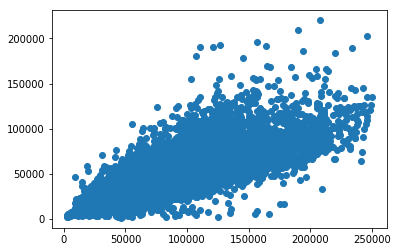

In [16]:
plt.scatter(df_17_cln.Income,df_17_cln.IncomePerCap)

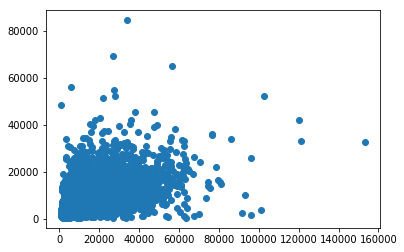

In [17]:
plt.scatter(df_17_cln.IncomeErr,df_17_cln.IncomePerCapErr)

TODO maybe try imputing Income and IncomeErr by regressing on IncomePerCap and IncomePerCapErr? Then impute the remaining variables to the median or mean

In [18]:
#Remove all the census data with missing values
df_17_cln = df_17_census.dropna(axis=0) #drop rows with missing values
df_17_cln.head()

,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
TractId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1001020100,Alabama,Autauga County,1845,899,946,2.4,86.3,5.2,0.0,1.2,0.0,1407,67826.0,14560.0,33018.0,6294.0,10.7,20.8,38.5,15.6,22.8,10.8,12.4,94.2,3.3,0.0,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1001020200,Alabama,Autauga County,2172,1167,1005,1.1,41.6,54.5,0.0,1.0,0.0,1652,41287.0,3819.0,18996.0,2453.0,22.4,35.8,30.5,24.9,22.9,6.3,15.4,90.5,9.1,0.0,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
1001020300,Alabama,Autauga County,3385,1533,1852,8.0,61.4,26.5,0.6,0.7,0.4,2480,46806.0,9496.0,21236.0,2562.0,14.7,21.1,27.9,19.4,33.3,9.9,9.6,88.3,8.4,0.0,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
1001020400,Alabama,Autauga County,4267,2001,2266,9.6,80.3,7.1,0.5,0.2,0.0,3257,55895.0,4369.0,28068.0,3190.0,2.3,1.7,29.0,16.6,25.8,9.1,19.5,82.3,11.2,0.0,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
1001020500,Alabama,Autauga County,9965,5054,4911,0.9,77.5,16.4,0.0,3.1,0.0,7229,68143.0,14424.0,36905.0,10706.0,12.2,17.9,48.8,13.8,20.5,3.5,13.4,86.9,11.2,0.0,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3


In [19]:
#Total count of missing values by column after deleting NA's

misCnt = df_17_cln.isnull().sum()
print ("-Attribute-        -Counts-")
print(misCnt)

State               0
County              0
TotalPop            0
Men                 0
Women               0
Hispanic            0
White               0
Black               0
Native              0
Asian               0
Pacific             0
VotingAgeCitizen    0
Income              0
IncomeErr           0
IncomePerCap        0
IncomePerCapErr     0
Poverty             0
ChildPoverty        0
Professional        0
Service             0
Office              0
Construction        0
Production          0
Drive               0
Carpool             0
Transit             0
Walk                0
OtherTransp         0
WorkAtHome          0
MeanCommute         0
Employed            0
PrivateWork         0
PublicWork          0
SelfEmployed        0
FamilyWork          0
Unemployment        0
dtype: int64


In [20]:
#Dimensions of our cleaned dataset
df_17_cln.shape

(72718, 36)

In addition to our fully cleaned original dataset, we created a smaller dataset consisting of only the top 5 most populated states.

In [21]:
# group by state 
agg_df = df_17_cln.groupby('State').sum()

# order by total population 
agg_df.sort_values('TotalPop', ascending = 0)

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
State,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
California,38773436,19221596,19551840,300205.7,311788.2,44004.7,3077.8,106445.4,2686.2,24787024,580040211.0,96145358.0,269711837.0,37997874.0,121934.8,152584.3,293752.5,150649.5,182982.3,75472.9,90351.2,582086.1,82866.4,41588.7,21418.7,20454.9,44795.2,227958.5,17962848,616186.2,108490.3,67089.3,1443.4,62335.4
Texas,27337059,13561197,13775862,201887.7,226932.5,60422.6,1290.9,19864.9,394.3,17439448,309697911.0,51070733.0,149607887.0,21747521.0,89913.4,123217.0,172806.6,96796.8,122544.0,61656.5,65891.4,415597.3,55474.2,8230.1,9072.7,9098.3,22231.5,131119.8,12673896,412583.8,69900.6,36261.0,957.8,31940.9
Florida,20158603,9853538,10305065,92350.5,238335.1,62323.9,899.6,9692.6,213.1,14350661,223651644.0,38765939.0,124381430.0,19735060.0,66122.6,89338.9,140760.5,84266.5,109552.7,38903.7,38524.3,324065.4,37576.6,8721.3,6981.9,9996.3,24659.1,109015.4,8997305,336271.7,49211.2,25780.8,733.6,30600.5
New York,19664161,9524775,10139386,84173.5,267079.2,73627.3,1419.9,39600.5,141.4,13631740,327139652.0,58503545.0,165608520.0,24339796.0,73965.1,94621.9,182889.2,100607.6,111339.2,35652.1,47314.1,254929.2,33025.6,133512.5,28842.3,8742.6,18744.2,158567.2,9430670,374303.0,75172.4,27625.6,705.3,34090.6
Illinois,12829297,6297133,6532164,49396.0,187432.2,52869.2,362.8,14369.8,69.0,9023509,196819535.0,30768202.0,99359711.0,13421897.0,47856.5,62907.4,109616.2,58055.7,73832.9,22830.6,46165.0,223760.4,25462.9,32641.2,9459.0,5684.2,13499.7,88795.0,6174487,257034.0,38300.7,14704.9,463.2,26163.4
Pennsylvania,12736617,6223973,6512644,20859.8,243623.9,36654.9,362.6,9382.7,58.2,9689036,188976002.0,28449382.0,98407553.0,12623747.0,45559.0,60613.8,114544.0,58881.1,73831.6,25852.4,44283.3,237523.6,27772.6,20649.9,13351.1,4714.9,13388.8,84146.7,6086041,267838.4,33170.8,15940.5,449.6,22303.5
Ohio,11569967,5659082,5910885,11373.2,220785.0,47600.6,475.1,5061.5,84.7,8723954,155470577.0,23692890.0,81046387.0,10879124.0,51979.7,71464.9,96923.0,56072.4,67829.8,22389.6,49881.3,239046.2,24307.1,7841.2,7549.8,3835.2,10523.6,68092.6,5478367,243763.5,34693.4,14226.1,417.0,23126.1
Georgia,10186727,4957093,5229634,16821.1,104391.0,62964.1,355.2,6354.7,86.2,7142446,106627231.0,17884024.0,53420463.0,7966107.0,37361.9,51803.6,67053.5,34627.8,46562.4,18838.6,27916.7,153337.4,20262.8,4954.2,3578.4,3546.3,9317.1,52711.3,4604292,153855.6,29934.4,10902.8,309.3,15964.3
North Carolina,10020307,4869596,5150711,18899.8,138214.5,46332.6,2355.2,5214.4,113.5,7278603,115126457.0,18582642.0,60859144.0,8682061.0,36942.2,51080.9,76021.8,39198.9,49464.9,20768.6,30446.9,174633.0,21017.7,2462.4,3955.0,3080.8,10755.9,51990.7,4569360,171650.1,31071.8,12825.9,354.8,16452.7


In [22]:
# Create a new dataset which contains data of states with top 5 total population
ca = df_17_cln.groupby('State').get_group('California')
tx = df_17_cln.groupby('State').get_group('Texas')
ny = df_17_cln.groupby('State').get_group('New York')
fl = df_17_cln.groupby('State').get_group('Florida')
il = df_17_cln.groupby('State').get_group('Illinois')
df_17_census_5 = pd.concat([ca,tx,ny,fl,il])
df_17_census_5.head()

,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
TractId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6001400100,California,Alameda County,2991,1442,1549,3.8,69.2,2.8,0.0,16.2,0.0,2350,208393.0,46352.0,115773.0,19839.0,4.2,8.4,72.4,8.1,15.6,1.5,2.5,52.4,10.6,14.3,0.5,2.2,20.0,34.8,1543,80.6,6.6,12.8,0.0,4.0
6001400200,California,Alameda County,1997,992,1005,8.9,71.3,0.9,0.3,9.8,0.0,1518,147500.0,34827.0,80558.0,7558.0,5.5,1.9,75.7,5.9,11.6,4.7,2.0,43.9,3.8,31.1,4.4,5.0,11.8,29.2,1231,77.4,10.2,11.6,0.8,3.7
6001400300,California,Alameda County,5123,2383,2740,7.5,67.0,9.4,0.0,9.8,0.8,4035,88173.0,11036.0,66529.0,13857.0,7.5,0.0,65.8,9.4,14.9,2.1,7.8,42.3,6.7,30.4,5.4,4.9,10.3,31.3,3213,73.0,17.8,9.2,0.0,5.5
6001400400,California,Alameda County,3991,1810,2181,9.4,65.8,6.0,0.3,12.1,0.0,3033,102821.0,13517.0,62705.0,6602.0,9.2,9.5,79.2,6.6,11.8,1.1,1.3,38.5,8.3,27.1,4.3,12.8,9.1,30.4,2499,73.9,15.2,10.7,0.3,5.0
6001400500,California,Alameda County,3944,1660,2284,10.3,53.4,24.1,0.0,5.6,0.8,3034,92375.0,18444.0,45313.0,4668.0,9.4,0.0,59.1,15.1,17.7,2.8,5.2,39.6,6.6,25.7,2.9,11.1,14.0,32.4,2587,77.1,14.1,8.8,0.0,2.6


### Simple Statistics

<div class="alert alert-block alert-info">
<b>Rubric 4:</b> Visualize appropriate statistics (e.g., range, mode, mean, median, variance, counts) for a subset of attributes. Describe anything meaningful you found from this or if you found something potentially interesting. Note: You can also use data from other sources for comparison. Explain why the statistics run are meaningful.
</div>

In [23]:
df_17_cln.columns

Index(['State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic', 'White',
       'Black', 'Native', 'Asian', 'Pacific', 'VotingAgeCitizen', 'Income',
       'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

In [24]:
df_17_cln.describe() # summary stats for numeric variables

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
count,72718.000000,72718.000000,72718.000000,72718.000000,72718.000000,72718.000000,72718.000000,72718.000000,72718.000000,72718.000000,72718.000000,72718.000000,72718.000000,72718.000000,72718.000000,72718.000000,72718.000000,72718.000000,72718.000000,72718.000000,72718.000000,72718.000000,72718.000000,72718.000000,72718.000000,72718.000000,72718.000000,72718.000000,72718.000000,72718.000000,72718.000000,72718.000000,72718.000000,72718.000000
mean,4443.485121,2184.362647,2259.122473,17.282951,61.337143,13.254417,0.727776,4.752459,0.146082,3141.161982,61119.999326,9690.325642,30666.653222,4249.725969,16.046724,21.148476,35.553813,18.847948,23.413165,9.263044,12.922312,75.880830,9.324557,5.370585,2.925778,1.886076,4.612646,26.080334,2081.309139,79.511827,14.149495,6.167661,0.171231,7.224917
std,2190.183318,1099.954423,1124.604806,23.084428,30.628031,21.581269,4.505791,8.995573,1.015198,1512.610257,30511.062580,6119.407315,15844.127467,2991.009809,12.428643,18.572714,15.038790,7.969609,5.591354,5.943849,7.592511,14.960499,5.107717,11.626060,5.260623,2.485812,3.770733,7.095680,1120.109805,7.957350,7.164790,3.798703,0.451630,5.099419
min,58.000000,26.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,2692.000000,728.000000,1631.000000,351.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.200000,20.000000,17.500000,0.000000,0.000000,0.000000,0.000000
25%,2958.000000,1440.000000,1494.000000,2.600000,38.100000,0.800000,0.000000,0.200000,0.000000,2096.000000,40380.000000,5737.000000,20624.000000,2508.000000,6.900000,6.200000,24.700000,13.300000,19.700000,5.000000,7.200000,72.400000,5.800000,0.000000,0.400000,0.400000,2.000000,21.100000,1306.000000,75.300000,9.300000,3.500000,0.000000,3.900000
50%,4137.000000,2024.000000,2102.000000,7.400000,70.500000,3.800000,0.000000,1.500000,0.000000,2926.000000,54413.000000,8268.000000,27249.000000,3404.000000,12.600000,16.300000,33.300000,17.700000,23.200000,8.400000,11.800000,79.900000,8.500000,1.000000,1.400000,1.200000,3.800000,25.400000,1915.000000,80.600000,13.000000,5.500000,0.000000,6.000000
75%,5532.750000,2719.000000,2817.000000,21.100000,87.700000,14.500000,0.400000,5.000000,0.000000,3923.000000,74688.000000,11909.000000,36413.000000,4959.000000,21.800000,31.600000,44.800000,23.200000,26.900000,12.500000,17.500000,84.900000,11.900000,4.600000,3.300000,2.500000,6.300000,30.300000,2651.000000,85.000000,17.600000,8.000000,0.000000,9.000000
max,65528.000000,32266.000000,33262.000000,100.000000,100.000000,100.000000,99.400000,91.400000,71.900000,39389.000000,249750.000000,153365.000000,220253.000000,84414.000000,100.000000,100.000000,92.200000,70.900000,72.300000,68.100000,60.500000,100.000000,64.000000,90.800000,77.700000,53.400000,82.800000,73.900000,28945.000000,100.000000,80.700000,47.400000,22.300000,62.800000


In [25]:
census_tract_income = df_17_cln[['Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr']]
census_tract_income.head()

,Income,IncomeErr,IncomePerCap,IncomePerCapErr
TractId,,,,
1001020100,67826.0,14560.0,33018.0,6294.0
1001020200,41287.0,3819.0,18996.0,2453.0
1001020300,46806.0,9496.0,21236.0,2562.0
1001020400,55895.0,4369.0,28068.0,3190.0
1001020500,68143.0,14424.0,36905.0,10706.0


In [26]:
census_tract_mean = census_tract_income['Income'].mean()
census_tract_median = census_tract_income['Income'].median()
print('From 2017 Census Tract data, household mean income is ' + str(census_tract_mean) + ', and household median income is ' +
      str(census_tract_median))

From 2017 Census Tract data, household mean income is 61119.999326164085, and household median income is 54413.0


### Visualize Attributes

<div class="alert alert-block alert-info">
<b>Rubric 5:</b> Visualize the most interesting attributes (at least 5 attributes, your opinion on what is interesting). Important: Interpret the implications for each visualization. Explain for each attribute why the chosen visualization is appropriate.
</div>

Our ultimate goal is to predict child poverty and unemployment rates for this dataset. To allow us to make these predictions in either a regression or a classification setting, we first created new features that split the target variables into discrete categories.

 1    30530
 0    19236
 2    13245
 3     5188
 4     2787
 5     1118
-1      614
Name: UnEmpCd, dtype: int64


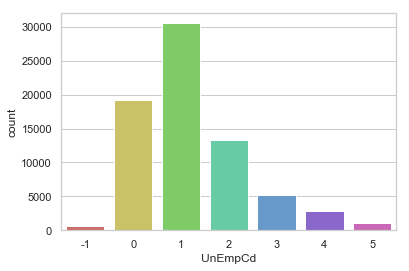

In [27]:
#Categorizing the unemployed percentages in range.
bins = pd.IntervalIndex.from_tuples([(0,4), (4,8), (8,12), (12,16), (16,22), (22,30)])
UnEmp = pd.cut(df_17_cln.Unemployment, bins)
UnEmp = UnEmp.to_frame()
UnEmp.columns = ['UnEmpCat']
df_new = pd.concat([df_17_cln,UnEmp],axis =1)
df_new.UnEmpCat = pd.Categorical(df_new.UnEmpCat)

df_new['UnEmpCd'] = df_new.UnEmpCat.cat.codes

print (df_new.UnEmpCd.value_counts())

#Show histogram of the categories
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
#draw histogram plot
sns.countplot(x = 'UnEmpCd', data = df_new, palette = 'hls')
plt.show()

The graph shows clearly the Unemployment percentage range. We see that the normal unemployment range is between 4 to 8 percent for majority of states in the US.

In [28]:
census_tract_mean = census_tract_income['Income'].mean()
census_tract_median = census_tract_income['Income'].median()
print('From 2017 Census Tract data, household mean income is ' + str(census_tract_mean) + ', and household median income is ' +
      str(census_tract_median))

From 2017 Census Tract data, household mean income is 61119.999326164085, and household median income is 54413.0


The intention here is to find through a box plot what is the medium Income and Income percapita of each state based on the statistics available. Gives an understanding of the quantiles and minimum and maximum values of the variables also. The graph also shows outliers at each state which needs to be dealt when doing training and predictions.

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52]), <a list of 52 Text xticklabel objects>)

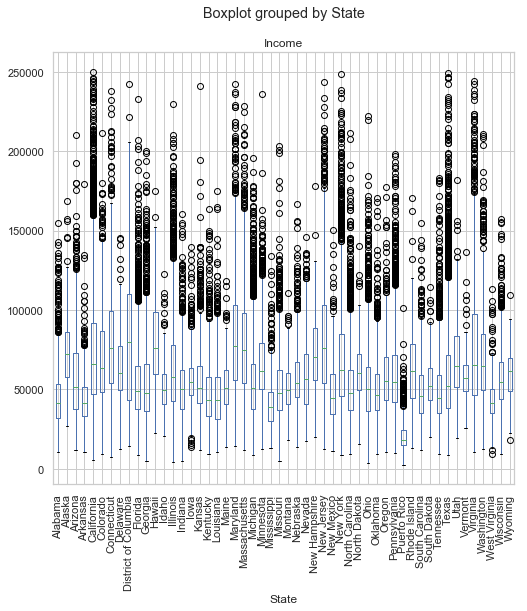

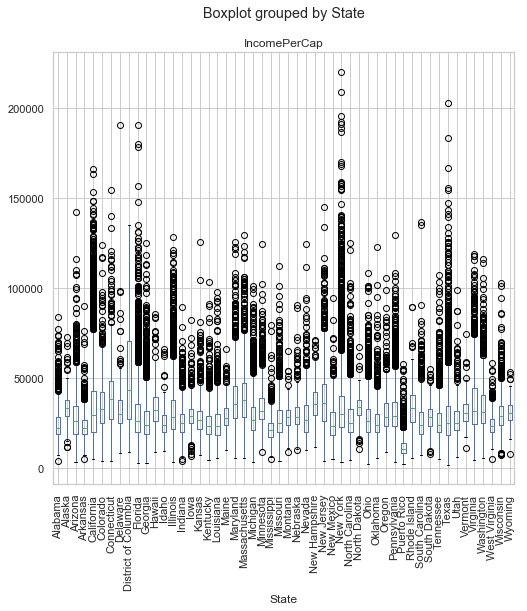

In [29]:
df_17_cln.boxplot(column="Income",  # Column to plot
                 by= "State",         # Column to split upon
                 figsize= (8,8))        # Figure size
plt.xticks(rotation=90)
df_17_cln.boxplot(column="IncomePerCap",  # Column to plot
                 by= "State",         # Column to split upon
                 figsize= (8,8))        # Figure size
plt.xticks(rotation=90)


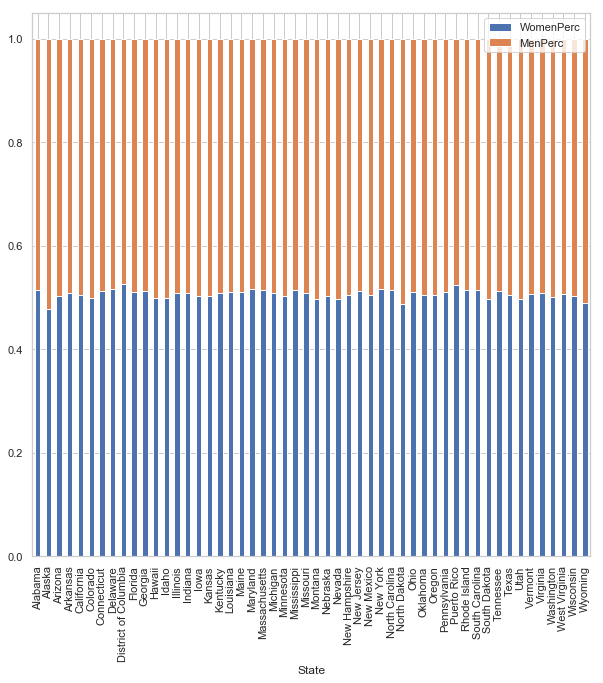

In [30]:
# Bar chart of the percentage of men and women in each state.
df_sum = df_17_cln.groupby(by=df_17_cln.State).sum()
df_sum.head()
df_sum['WomenPerc'] = df_sum['Women']/df_sum['TotalPop']
df_sum['MenPerc'] = df_sum['Men']/df_sum['TotalPop']
df_GenderPerc = df_sum.loc[: ,['WomenPerc', 'MenPerc']]
df_GenderPerc.plot(kind='bar', stacked=True, figsize=(8,8))

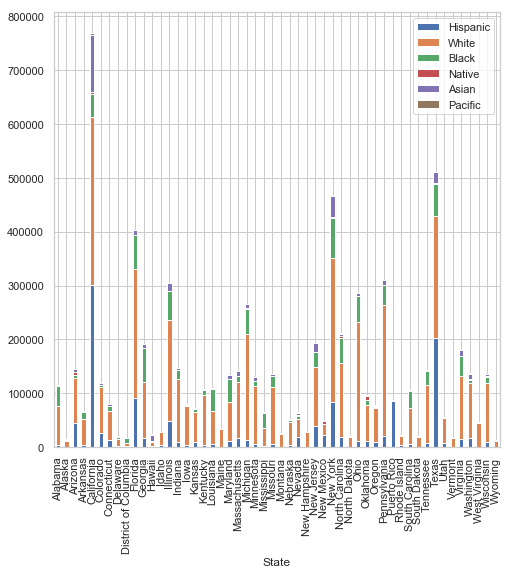

In [31]:
# Bar chart of the percentage of Race of population in each state.
df_sum = df_17_cln.groupby(by=df_17_cln.State).sum()
df_sum.head()
df_sum['Hispanic_perc'] = df_sum['Hispanic']
df_sum['White_perc'] = df_sum['White']
df_sum['Black_perc'] = df_sum['Black']
df_sum['Native_perc'] = df_sum['Native']
df_sum['Asian_perc'] = df_sum['Asian']
df_sum['Pacific_perc'] = df_sum['Pacific']
df_racePerc = df_sum.loc[: ,['Hispanic', 'White', 'Black', 'Native','Asian','Pacific']]
df_racePerc.plot(kind='bar', stacked=True, figsize=(8,8))

#### Top 5 States with largest income per Capita by State:

In [32]:
#Top 5 states with the largest income per capita
df_5_counties_income = df_17_cln[["State", "IncomePerCap"]].groupby("State")["IncomePerCap"].sum().nlargest(5)
df_5_counties_income

State
California    269711837.0
New York      165608520.0
Texas         149607887.0
Florida       124381430.0
Illinois       99359711.0
Name: IncomePerCap, dtype: float64

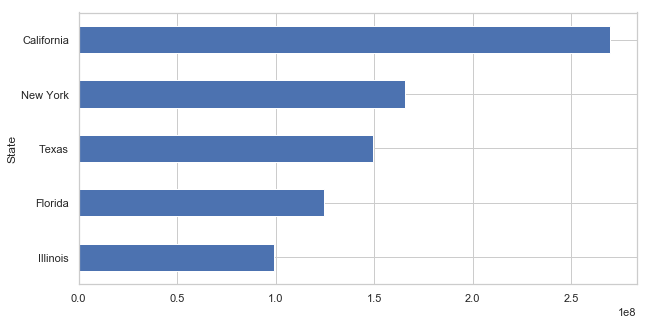

In [33]:
df_5_counties_income.sort_values().plot(kind="barh", x="IncomePerCap", y="State", figsize=(10, 5))

#### Total Population by State:

In [34]:
#Get Total Population by State
df_pop_state = df_17_cln[["State", "TotalPop"]].groupby('State')["TotalPop"].sum()
df_pop_state.head()

State
Alabama        4842699
Alaska          735782
Arizona        6707875
Arkansas       2976037
California    38773436
Name: TotalPop, dtype: int64

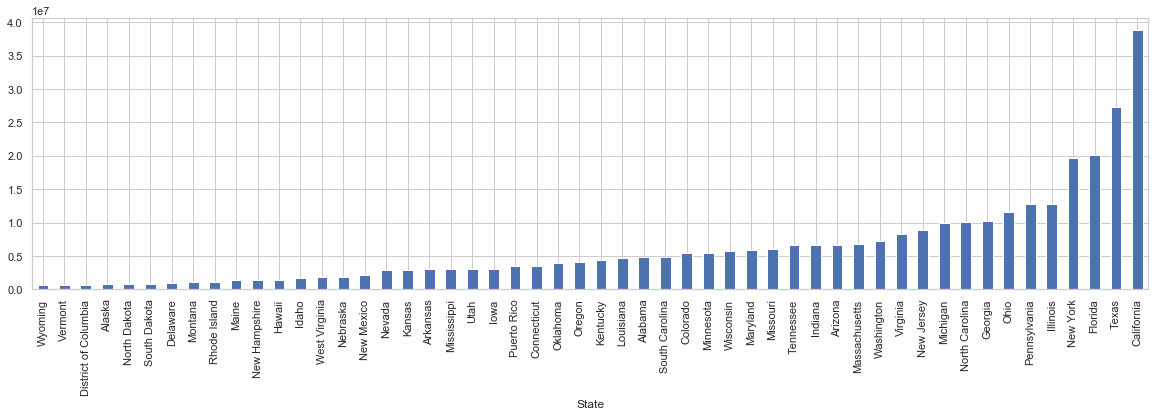

In [35]:
# Sorted, vertical bar
df_pop_state.sort_values().plot(kind="bar", x="State", y="TotalPop", figsize=(20, 5))

### Explore Joint Attributes

<div class="alert alert-block alert-info">
<b>Rubric 6:</b> Visualize relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships.
</div>

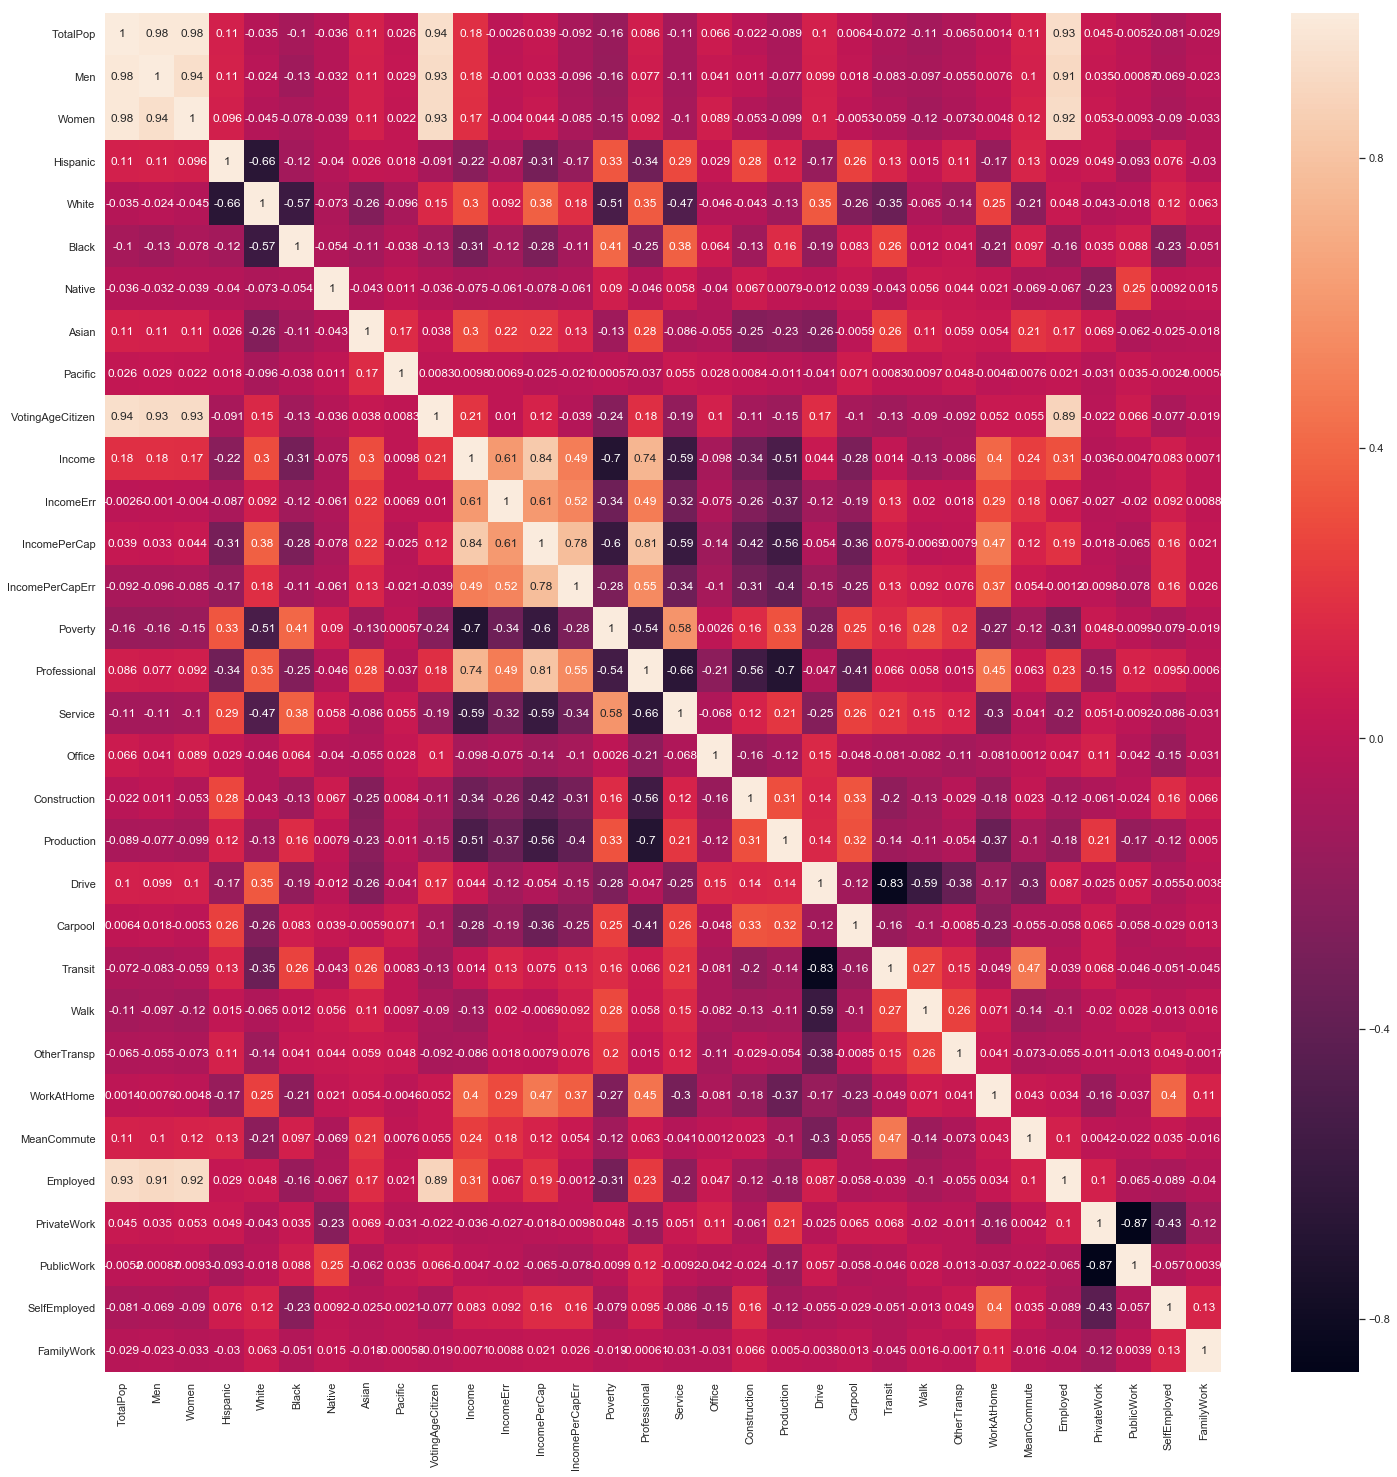

In [76]:
# Correlation plot for all the attributes. Maybe we can use to see if any of the attributes can be removed
# because they provide similar info.
df_attributes = df_17_cln.drop(['State', 'County', 'ChildPoverty', 'Unemployment'], axis=1)
sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(25, 25))
sns.heatmap(df_attributes.corr(), annot=True)

#### Correlation of Income to Poverty:

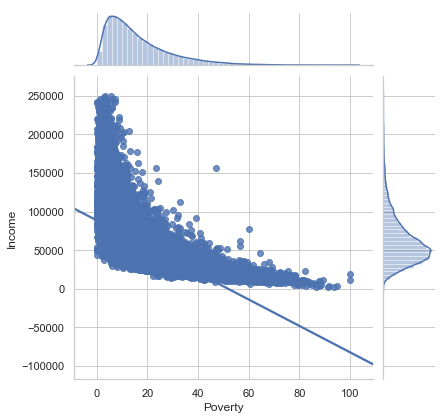

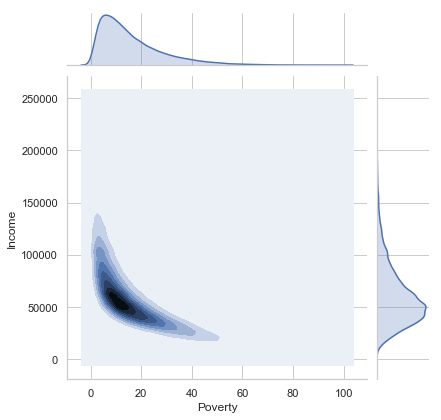

In [50]:
#df_corr_income_poverty = pd.pivot_table(df_17_cln, values=["Income","Poverty"], index="State", aggfunc=np.mean)
#df_corr_income_poverty.plot(kind="scatter", y="Income", x="Poverty")
sns.jointplot(x='Poverty', y='Income', data=df_17_cln, kind="reg")
_ = sns.jointplot(x='Poverty', y='Income', data=df_17_cln, kind="kde")

#### Correlation of Unemployment to Poverty (linear regression with marginal distributions): 

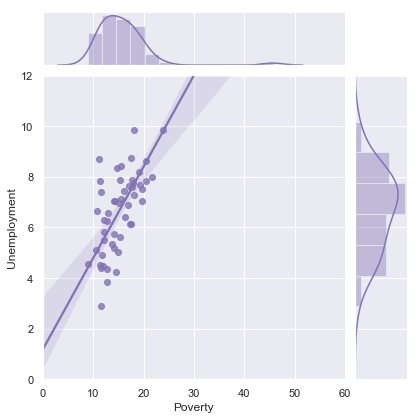

In [39]:
df_jp = pd.pivot_table(df_17_cln, values=["Unemployment","Poverty"], index="State", aggfunc=np.mean)
g = sns.jointplot(data=df_jp, kind="reg", xlim=(0,60), ylim=(0,12), color = "m",height = 6,
                  y='Unemployment', x='Poverty')

From the scatter plot the correlation between Unemployment and poverty is seen for each state. May be useful in future prediction algorithm. The two variables are quite normal interms of distribution.

#### Poverty by State:

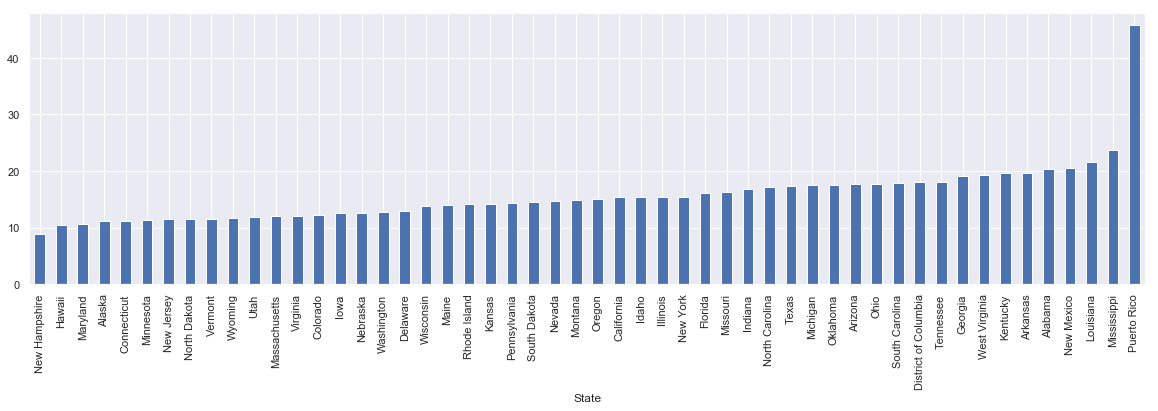

In [40]:
df_corr_income_poverty["Poverty"].sort_values().plot(kind="bar", y="Poverty", x=df_corr_income_poverty.index, figsize=(20,5))

From the bar plot above the states with the highest poverty are Puerto Rico, Mississipi, Louisiana, New Mexico and Albama.

#### Child Poverty by State's Total population: 

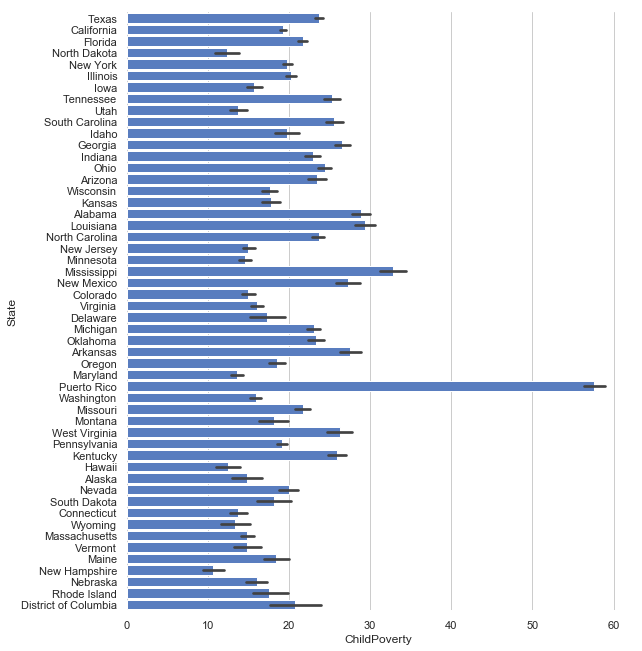

In [41]:
# create a new dataframe sorted by total population descending:
childpoverty = df_17_cln.sort_values('TotalPop', axis=0, ascending=False)

sns.set_style('whitegrid')
sns.set_color_codes('muted')
plt.figure(figsize=(9,11))

sns.barplot(x=childpoverty['ChildPoverty'], 
            y=childpoverty['State'], 
            data=childpoverty, label='Child Poverty', 
            color='b')
sns.despine(left=True, bottom=True)

From the bar plot above the states with the highest Childhood poverty are Puerto Rico, Mississipi, Louisiana, New Mexico and Albama.

### Explore Attributes and Class

<div class="alert alert-block alert-info">
<b>Rubric 7:</b> Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification).
</div>

Our ultimate goal is to predict child poverty and unemployment rates for this dataset. To allow us to make these predictions in either a regression or a classification setting, we first created new features that split the target variables into discrete categories.

low          18580
med          18302
very_high    18103
high         17733
Name: UnempCat, dtype: int64


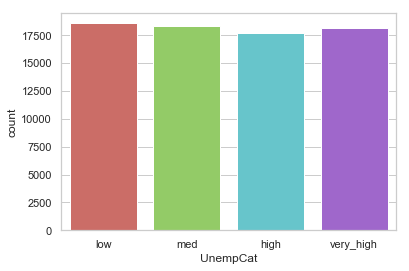

In [42]:
#Categorizing the unemployed percentages in range
#Makes cutoffs using quartiles of clean dataset, so they are roughly equal
pd.options.mode.chained_assignment = None
df_17_cln['UnempCat'] = pd.cut(df_17_cln.Unemployment,[-1,3.9,6,9,100],labels=['low','med','high','very_high'])
print (df_17_cln.UnempCat.value_counts())
pd.options.mode.chained_assignment = 'warn'

#Show histogram of the categories
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
#draw histogram plot
sns.countplot(x = 'UnempCat', data = df_17_cln, palette = 'hls')
plt.show()

In [43]:
df_17_cln.groupby(by='UnempCat').median()

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
UnempCat,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
low,4201.5,2058.0,2126.0,5.2,82.3,2.0,0.0,1.9,0.0,3065.0,69404.5,9551.0,34767.5,4123.0,7.5,7.8,41.9,14.3,22.8,7.1,9.1,81.4,7.4,0.6,1.2,1.0,4.9,24.4,2139.0,80.5,12.7,5.8,0.0,2.8
med,4367.0,2140.5,2211.0,6.8,76.5,2.7,0.0,1.9,0.0,3134.0,61971.0,8925.0,30598.5,3680.0,9.8,11.7,36.9,16.2,23.2,8.1,10.7,81.0,8.1,0.8,1.2,1.1,4.2,25.7,2134.0,80.5,12.9,5.7,0.0,5.0
high,4230.0,2073.0,2146.0,9.1,67.7,4.3,0.0,1.5,0.0,2966.0,52172.0,8124.0,26007.0,3291.0,13.9,18.4,31.6,18.6,23.4,9.1,12.6,80.1,9.0,1.0,1.3,1.2,3.5,25.9,1947.0,80.5,13.0,5.5,0.0,7.3
very_high,3726.0,1798.0,1912.0,11.3,34.5,13.1,0.0,0.7,0.0,2518.0,36833.0,6748.0,18875.0,2751.0,25.3,35.4,24.5,23.2,23.7,9.2,15.0,76.3,10.1,2.1,1.9,1.4,2.7,25.5,1446.0,80.7,13.3,4.9,0.0,12.3


#### Relationship between Unemployment and Race:

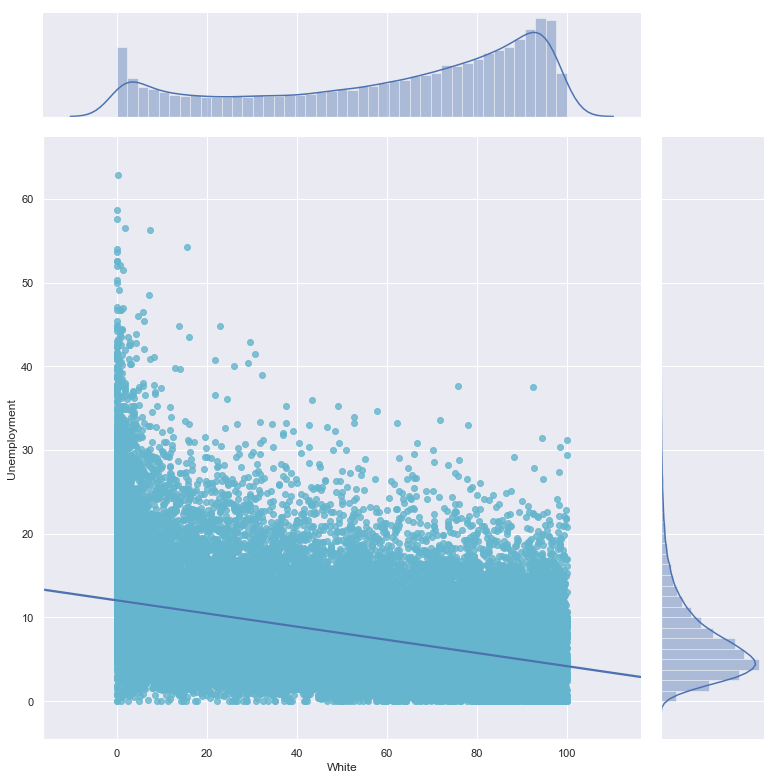

In [109]:
sns.jointplot(x='White', y='Unemployment', data=df_17_cln, kind='reg',scatter_kws={'color':'c'}, size=8)

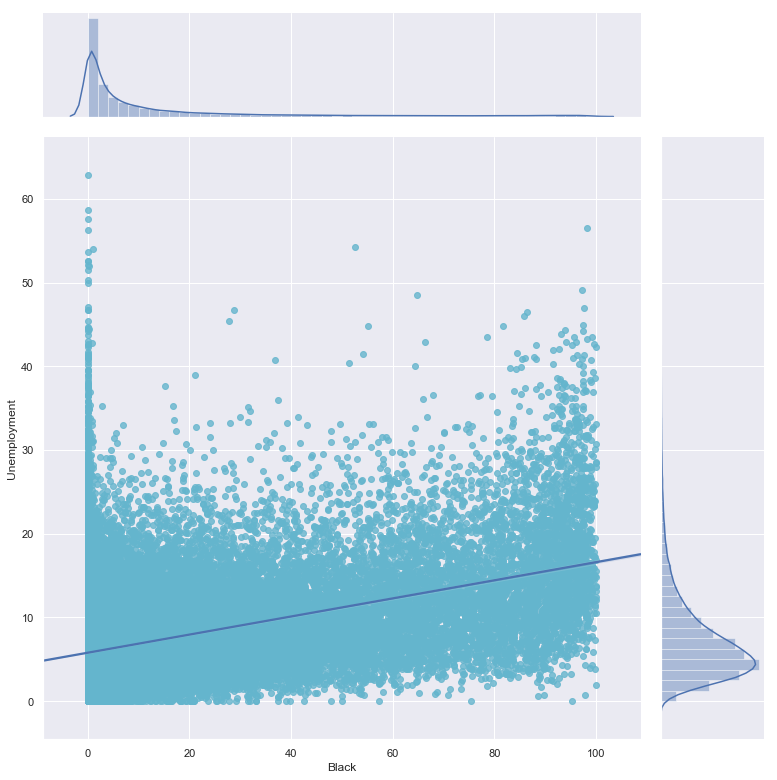

In [110]:
sns.jointplot(x='Black', y='Unemployment', data=df_17_cln, kind='reg', scatter_kws={'color':'c'}, size=8)

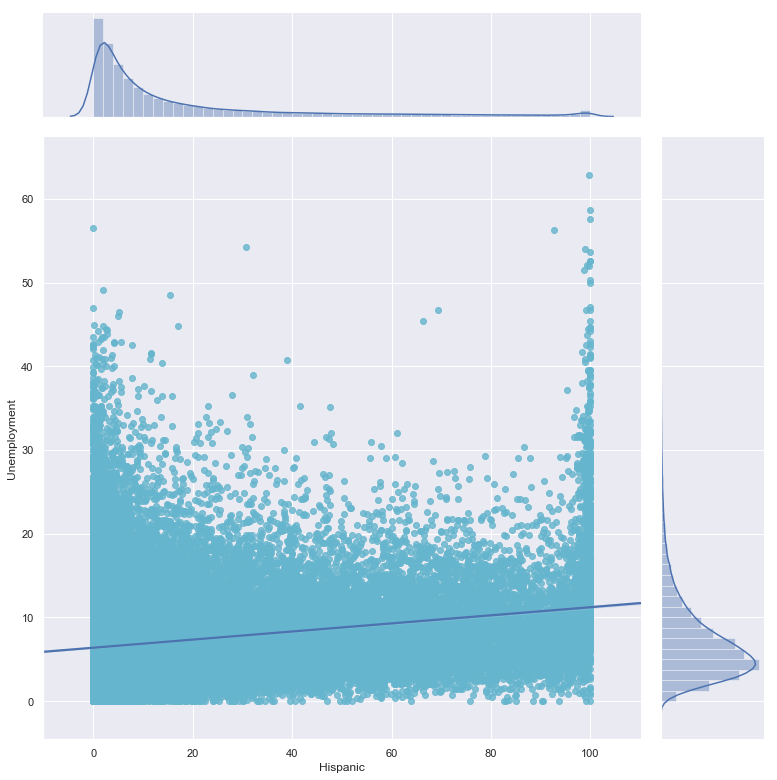

In [111]:
sns.jointplot(x='Hispanic', y='Unemployment', data=df_17_cln, kind='reg', scatter_kws={'color':'c'}, size=8)

As can be seen from the above scatterplots the Unemployment rate and the ethnic/racial group percentage shows a strong correlation. There are clear patterns in the data indicating that the Unemployment rate is correlated either in a positive or negative direction depending on the ethnic/racial breakdown of a particular community.

#### Relationship between Child Poverty and Race:

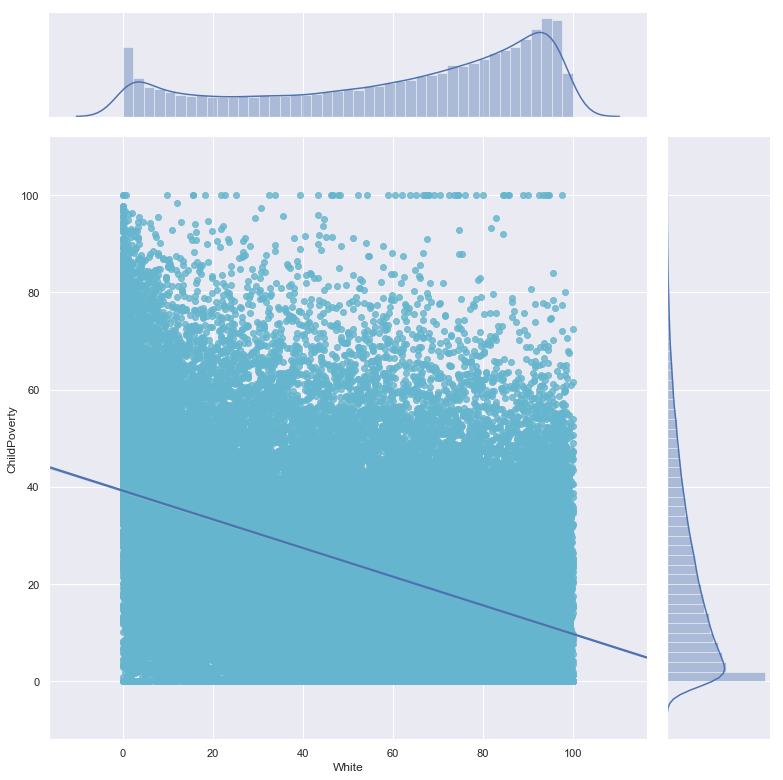

In [112]:
sns.jointplot(x='White', y='ChildPoverty', data=df_17_cln, kind='reg', scatter_kws={'color':'c'}, size=8)

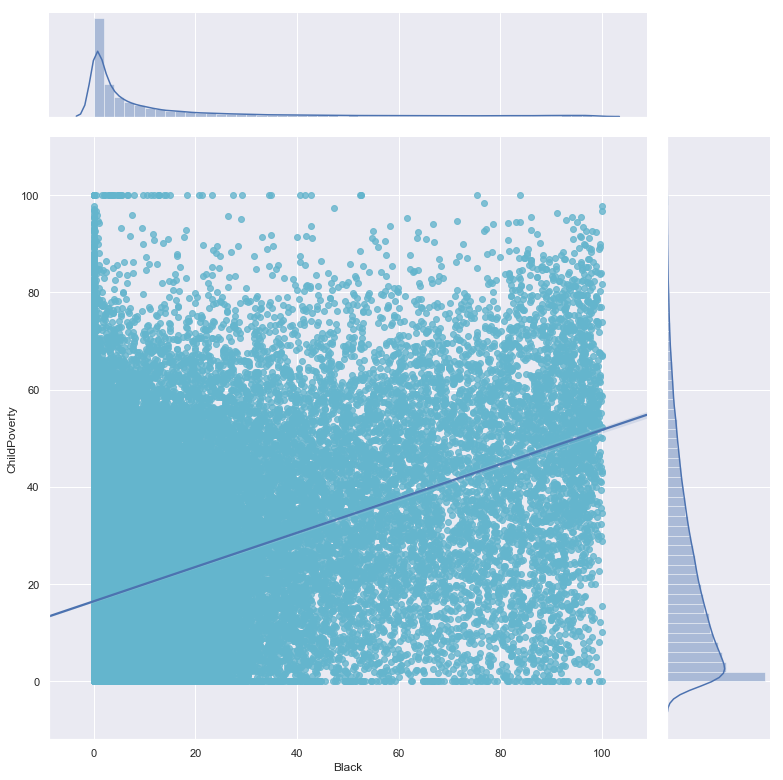

In [113]:
sns.jointplot(x='Black', y='ChildPoverty', data=df_17_cln, kind='reg', scatter_kws={'color':'c'}, size=8)

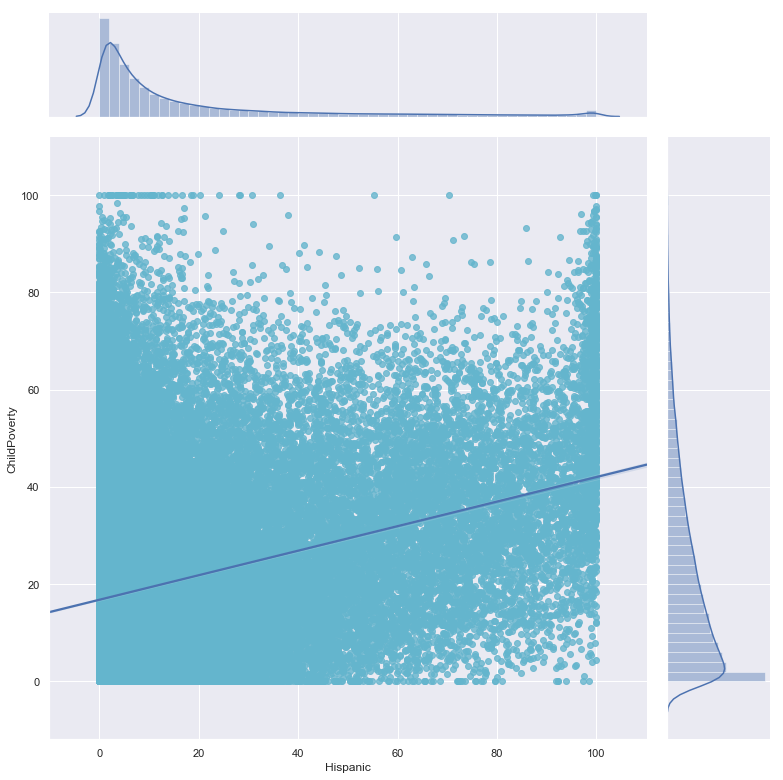

In [114]:
sns.jointplot(x='Hispanic', y='ChildPoverty', data=df_17_cln, kind='reg', scatter_kws={'color':'c'}, size=8)

As can be seen from the above scatterplots the Child poverty rate and the ethnic/racial group percentage shows a strong correlation. There are clear patterns in the data indicating that the Child poverty rate is correlated either in a positive or negative direction depending on the ethnic/racial breakdown of a particular community.

### New Features

<div class="alert alert-block alert-info">
<b>Rubric 8:</b> Are there other features that could be added to the data or created from existing features? Which ones?
</div>

#### LDA Analysis

LDA anaysis for Unemployment
Linear Discriminant Analysis (LDA) would identify the attributes showing the most variance between classes. LDA is a supervised learning using class labels.

In [96]:
#Computing dimensional mean vectors
#ref: https://www.apsl.net/blog/2017/07/18/using-linear-discriminant-analysis-lda-data-explore-step-step/

np.set_printoptions(precision=6)# Here we used the Ratios on several variables for LDA analysis

#Ratio of Income Error to Income
df_17_cln['IncErrRatio'] = df_17_cln['IncomeErr'] / df_17_cln['Income']
#Ratio of Income percapita error to Income percapita
df_17_cln['IncPCErrRatio'] = df_17_cln['IncomePerCapErr'] / df_17_cln['IncomePerCap']
#Ratio of Voting Age citizens to total population
df_17_cln['VotingAgeR'] = df_17_cln['VotingAgeCitizen']/df_17_cln['TotalPop']
# Ratio of Employed to total population
df_17_cln['EmpRatio'] = df_17_cln['Employed']/df_17_cln['TotalPop']
# Ratio of Individual race on total population
df_17_cln['AsianR'] = df_17_cln['Asian']/df_17_cln['TotalPop']
df_17_cln['WhiteR'] = df_17_cln['White']/df_17_cln['TotalPop']
df_17_cln['HispR'] = df_17_cln['Hispanic']/df_17_cln['TotalPop']
df_17_cln['BlackR'] = df_17_cln['Black']/df_17_cln['TotalPop']

x = df_17_cln[[ 'Employed','WhiteR','BlackR','HispR']].values
y = df_17_cln['UnempCat'].values

enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1

label_dict = {1: 'low', 2: 'med', 3: 'high', 4: 'very_high'}
# Mean vectors for each class obtained on LDA
print ("The dimensional mean vectors are as below for each class:")
mean_vec = []
for cl in range(1,5):
    mean_vec.append(np.mean(x[y==cl], axis=0))
    print('Mean Vector class %s: %s\n' %(cl, mean_vec[cl-1]))

Within class and Between class scatter matrix is created in the following code.

In [96]:
#Within class scatter matrix creation
S_W = np.zeros((4,4))
for cl,mv in zip(range(1,4), mean_vectors):
    class_sc_mat = np.zeros((4,4))                  # scatter matrix for every class
    for row in x[y == cl]:
        row, mv = row.reshape(4,1), mv.reshape(4,1) # make column vectors
        class_sc_mat += (row-mv).dot((row-mv).T)
    S_W += class_sc_mat                             # sum class scatter matrices
print('within-class Scatter Matrix:\n', S_W)

In [96]:
#Between class scatter matrix creation
all_mean = np.mean(x, axis=0)

S_B = np.zeros((4,4))
for i,mean_vec in enumerate(mean_vectors):  
    n = x[y==i+1,:].shape[0]
    mean_vec = mean_vec.reshape(4,1) # make column vector
    all_mean = all_mean.reshape(4,1) # make column vector
    S_B += n * (mean_vec - all_mean).dot((mean_vec - all_mean).T)

print('between-class Scatter Matrix:\n', S_B)


Calculating the generalized values of LDA and print the Eigen vectors and validating them.

In [96]:
#The generalized values of linear discriminants are printed
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i].reshape(4,1)   
    print('\nEigenvector {}: \n{}'.format(i+1, eigvec_sc.real))
    print('Eigenvalue {:}: {:.2e}'.format(i+1, eig_vals[i].real))

In [96]:
#validating the Eigen vector's values calculations have no errors
for i in range(len(eig_vals)):
    eigv = eig_vecs[:,i].reshape(4,1)
    np.testing.assert_array_almost_equal(np.linalg.inv(S_W).dot(S_B).dot(eigv),
                                         eig_vals[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)
print("Validated",'ok')

The Eigen vectors and eigen values provide us with distortion of the linear transformation. The eigenvector shows the direction and the eigenvalues show the magnitude of distortion.

In [96]:
# Make a list of (eigenvalue, eigenvector) values and sorted
eig_pair = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pair = sorted(eig_pair, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in decreasing order:\n')
for i in eig_pair:
    print(i[0])

Printing the eigen values for the eigen vectors in decreasing order.

In [96]:
#Printing variance in percentage 
print('Variance percentage explained:\n')
ev_sum = sum(eig_vals)
for i,j in enumerate(eig_pairs):
    print('eigen_value {0:}: {1:.2%}'.format(i+1, (j[0]/ev_sum).real))

The first eigenvector has most information and so we would not lose (98%) if we create a one dimension feature based on the values printed in decreasing order.

In [96]:
#Choose largest eigenvalues
W = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1)))
print('Matrix W:\n', W.real)

#Transforming the sample to new space
X_lda = x.dot(W)


Here we visalize the scatter plot

In [96]:
#LDA using Skikit learn - Code is modified from www.apsl.net blog
sklearn_lda = LDA(n_components=2)
X_lda_sklearn = sklearn_lda.fit_transform(x, y)

def plot_scikit_lda(X, title):

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,5),('^', 's', 'o', 'x'),('blue', 'red', 'green', 'yellow')):

        plt.scatter(x=X_lda[:,0][y == label],
                    y=X_lda[:,1][y == label] * -1, # flip the figure
                    marker=marker,
                    color=color,
                    alpha=0.5,
                    label=label_dict[label])

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title)
    
    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

plot_scikit_lda(X_lda_sklearn, title='LDA on Unemployment by combination of White, Black and Hispanic ratio on total population')


#### PCA Analysis

In [96]:
# create a subset of plottable features:
features_plot = ['Men', 
                 'Women', 
                 'Hispanic', 
                 'White', 
                 'Black', 
                 'Native', 
                 'Asian', 
                 'Pacific', 
                 'VotingAgeCitizen', 
                 'Income', 
                 'IncomePerCap', 
                 'Poverty', 
                 'ChildPoverty', 
                 'Professional', 
                 'Service', 
                 'Office', 
                 'Construction', 
                 'Production', 
                 'Drive', 
                 'Carpool', 
                 'Transit', 
                 'Walk', 
                 'OtherTransp', 
                 'WorkAtHome', 
                 'MeanCommute', 
                 'Employed', 
                 'PrivateWork', 
                 'PublicWork', 
                 'SelfEmployed', 
                 'FamilyWork', 
                 'Unemployment']
cluster_plot_df = df_17_cln[features_plot]

In [104]:
from sklearn.decomposition import PCA

X = cluster_plot_df
#y = iris.target
#target_names = iris.target_names

pca = PCA(n_components=10)
pca.fit(X) # fit data and then transform it
X_pca = pca.transform(X)

# print the components

print ('pca:', pca.components_)

pca: [[-4.33544834e-03 -3.01052621e-03  3.56890731e-01 -6.75732706e-01
   3.01409839e-01  5.27355628e-03  1.15573270e-02  1.79725812e-03
  -2.01173498e-02 -1.64879342e-01 -1.01766007e-01  2.15684600e-01
   3.15333741e-01 -2.29234752e-01  1.70903008e-01  9.69192108e-03
   3.75340906e-02  9.52322660e-02 -1.27987714e-01  6.50642924e-02
   1.02546049e-01  1.87060312e-02  1.79768282e-02 -3.73129104e-02
   3.24273400e-02 -1.57927017e-02  1.91009439e-02 -5.11196264e-03
  -2.33379549e-02 -2.53506962e-03  1.15351319e-01]
 [ 2.67693271e-02  2.65962871e-02  3.55121978e-01 -3.57516839e-01
  -1.89236146e-01 -8.15028373e-03  2.05000399e-01  3.55219143e-03
   1.71643500e-02  3.05803977e-01  1.58654906e-01 -1.91859303e-01
  -3.28611972e-01  3.85140259e-01 -1.32797612e-01 -2.38332595e-02
  -1.03643691e-01 -2.86161428e-01 -2.33034115e-01 -5.24724431e-02
   2.13462999e-01  2.49935537e-02  1.95228876e-02  5.18457567e-02
   1.62659254e-01  4.58442227e-02 -2.63569401e-02  5.37074333e-03
   3.77181350e-02 -2

### Exceptional Work

<div class="alert alert-block alert-info">
<b>Rubric 9:</b> You have free reign to provide additional analyses. One idea: implement dimensionality reduction, then visualize and interpret the results.
</div>

### References

- https://www.kaggle.com/pstetz/comprehensive-look-at-the-2015-acs-estimate